In [1]:
import os
import utils.cop as cop
from utils.data_loader import load_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import seaborn
import seaborn as sns
%matplotlib widget
# Apply the default theme
sns.set_theme()
sns.set(font_scale=1.2)



In [4]:

# path = f"./COP analysis/data/2023-06-15 mci002"
root = './data/2023-06-15 mci002/'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))

print(file_list)

data = load_data(file_list[:4])

# c = cop.CenterOfPressure([data_left, data_right])
# print('left: ', c.get_cop_foot('left'))
# print('right: ', c.get_cop_foot('right'))



['./data/2023-06-15 mci002/S10_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S10_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S11_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S11_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S12_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S12_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S13_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S13_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S14_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S14_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S15_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S15_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S16_20230616_rawDataLeft_60PUIKDwA5.txt', './data/2023-06-15 mci002/S16_20230616_rawDataRight_60PUIKDwA5.txt', './data/2023-06-15 mci002/S17_20230616_r

In [4]:
focus = [2,3]
print(file_list[focus[0]])
print(file_list[focus[1]])

./COP analysis/data/2023-06-15 mci002/S11_20230616_rawDataLeft_60PUIKDwA5.txt
./COP analysis/data/2023-06-15 mci002/S11_20230616_rawDataRight_60PUIKDwA5.txt


# COP Y


Text(0.5, 0, 'Time[s]')

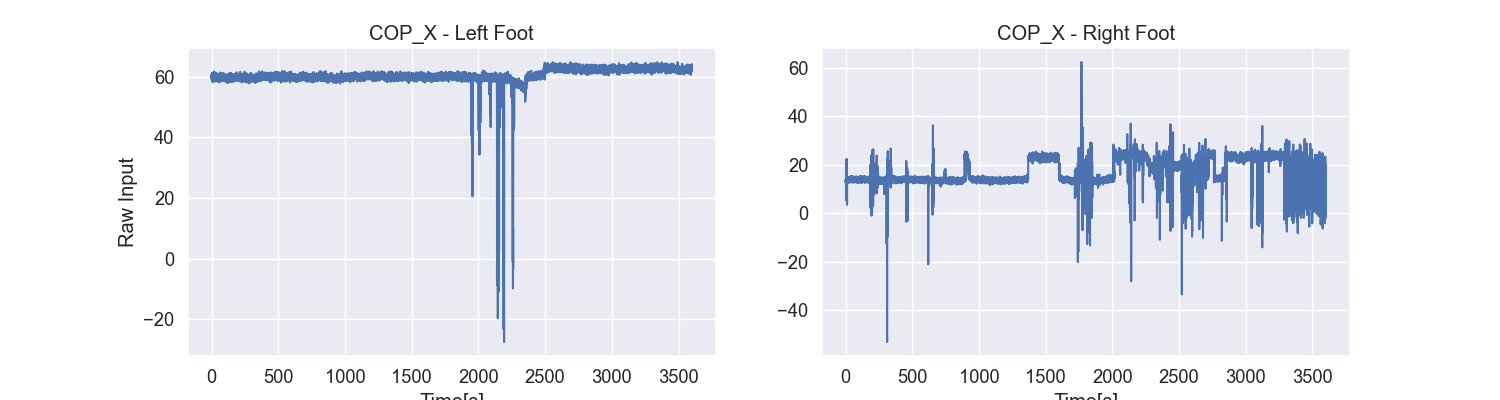

In [5]:
data_left = data[focus[0]]
data_right =  data[focus[1]]
c = cop.CenterOfPressure([data_left, data_right])

left_cop = c.get_cop_foot('left')
right_cop = c.get_cop_foot('right')

left_time = [x * 0.05 for x in range(len(left_cop[0]))]
right_time = [x * 0.05 for x in range(len(right_cop[0]))]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_X - Left Foot')
plt.plot(left_time, left_cop[1])
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_X - Right Foot')
plt.plot(right_time, right_cop[1])
plt.xlabel('Time[s]')

# COP_X


Text(0.5, 0, 'Time[s]')

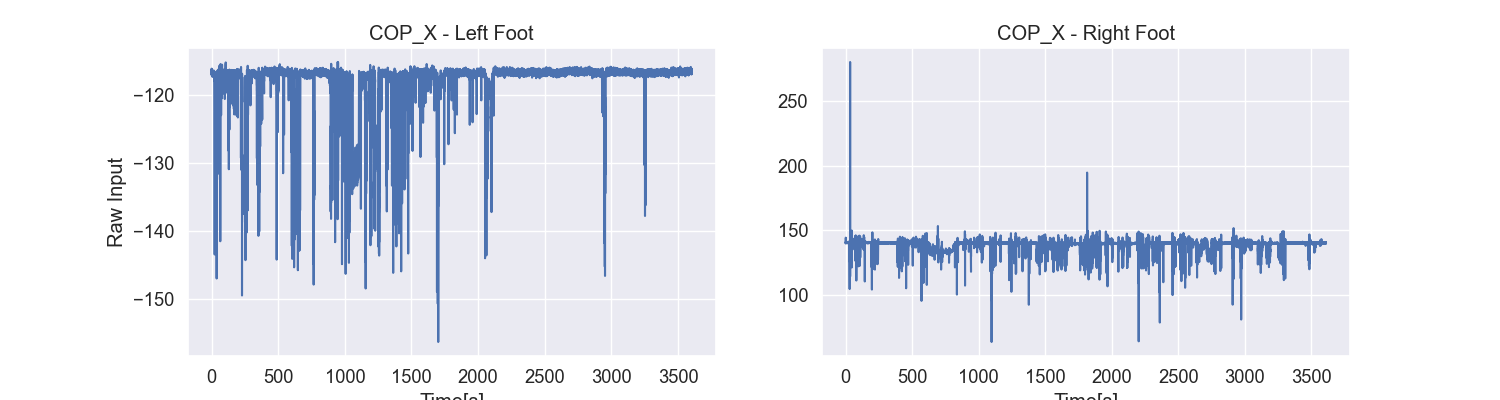

In [60]:
data_left = data[focus[0]]
data_right =  data[focus[1]]
c = cop.CenterOfPressure([data_left, data_right])

left_cop = c.get_cop_foot('left')
right_cop = c.get_cop_foot('right')

left_time = [x * 0.05 for x in range(len(left_cop[0]))]
right_time = [x * 0.05 for x in range(len(right_cop[0]))]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_X - Left Foot')
plt.plot(left_time, left_cop[0])
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_X - Right Foot')
plt.plot(right_time, right_cop[0])
plt.xlabel('Time[s]')

# Additional Analysis


(66.0, 70.0)

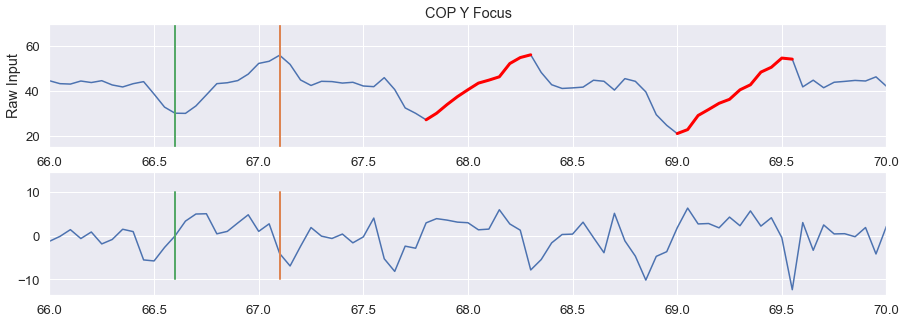

In [154]:
mask = [1356,1367,1380,1392]
left_cop[1][mask]

dummy = np.zeros(len(left_cop[1]))
diff = np.diff(left_cop[1])
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.lineplot(x=time, y=left_cop[1])
sns.lineplot(x=67.1, y=[0,100], estimator=None, linewidth=2)
sns.lineplot(x=66.6, y=[0,100], estimator=None, linewidth=2)
sns.lineplot(x=time[mask[0]:mask[1]], y=left_cop[1][mask[0]:mask[1]], estimator=None, linewidth=3, color='red')
sns.lineplot(x=time[mask[2]:mask[3]], y=left_cop[1][mask[2]:mask[3]], estimator=None, linewidth=3, color='red')
plt.xlabel('Time[s]')
plt.title('COP Y Focus')
plt.ylabel('Raw Input')
plt.ylim(15,70)
plt.xlim(66,70)

plt.subplot(2,1,2)
plt.plot(time[:-1], diff)
sns.lineplot(x=67.1, y=[-10,10], estimator=None, linewidth=2)
sns.lineplot(x=66.6, y=[-10,10], estimator=None, linewidth=2)
plt.xlim(66,70)